In [16]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [17]:
stock_symbols = ['AMZN','MSFT','AAPL']

# Prepare data

In [18]:
def create_seq_data(data, num_days):
    x = []
    y = []

    print(len(data))
    for i in range(0,len(data)-num_days-1):
        x.append(data.iloc[i:i+num_days])
        y.append(data.iloc[i+num_days])

    return np.array(x), np.array(y)


# Create and evaluate model

In [19]:
def model_func(stock_symbol):
    stock_data = yf.download(stock_symbol, start="2010-01-01", end=pd.Timestamp.now())
    stock_data['Date'] = stock_data.index
    stock_data.reset_index(drop=True, inplace=True)

    train_size = int(0.8 * len(stock_data))
    train_data = stock_data.iloc[:train_size]
    test_data = stock_data.iloc[train_size:]

    # print(train_data['Open'])
    num_prev_days = 30

    xtrain, ytrain = create_seq_data(train_data['Open'],num_prev_days)
    xtest, ytest = create_seq_data(test_data['Open'],num_prev_days)

    # xtrain = train_data[['Open','High','Low','Volume']]
    # ytrain = train_data['Close']
    # xtest = test_data[['Open','High','Low','Volume']]
    # ytest = test_data['Close']

    model = OLS(ytrain, xtrain).fit()
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    train_mse = mean_squared_error(ytrain,train_pred)
    test_mse = mean_squared_error(ytest,test_pred)

    train_mae = mean_absolute_error(ytrain,train_pred)
    test_mae = mean_absolute_error(ytest,test_pred)

    train_r2 = r2_score(ytrain,train_pred)
    test_r2 = r2_score(ytest,test_pred)

    print(f"Summary for {stock_symbol}: ")
    display(model.summary())

    plt.subplot(1, 2, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], label='Actuals', color='red')
    plt.plot(train_data['Date'].iloc[num_prev_days+1:], train_pred, label='Train predictions', color='blue')
    plt.plot(test_data['Date'].iloc[num_prev_days+1:], test_pred, label='Test predictions', color='green')
    plt.title(f"{stock_symbol} Actual vs Predictions")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(train_data['Date'].iloc[num_prev_days+1:], ytrain - train_pred, label='Train residuals', alpha=0.5)
    plt.scatter(test_data['Date'].iloc[num_prev_days+1:], ytest - test_pred, label='Test residuals', alpha=0.5)
    plt.title(f"{stock_symbol} Residuals")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()



    plt.show()

    return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2


# Results

[*********************100%%**********************]  1 of 1 completed


2875
719
Summary for AMZN: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.277e+05
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:38:28   Log-Likelihood:                         -4875.9
No. Observations:                2844   AIC:                                      9812.
Df Residuals:                    2814   BIC:                                      9990.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0470      0.019      2.433      0.015       0.009       0.085
x2            -0.0677      0.026     -2.586      0.010      -0.119      -0.016
x3             0.0050      0.026      0.191      0.848      -0.046       0.056
x4             0.0824      0.026      3.160      0.002       0.031       0.134
x5             0.0264      0.026      1.013      0.311      -0.025       0.078
x6            -0.0956      0.026     -3.675      0.000      -0.147      -0.045
x7            -0.0011      0.026     -0.041      0.967      -0.052       0.050
x8             0.0250      0.026      0.963      0.336      -0.026       0.076
x9             0.0336      0.026      1.293      0.196      -0.017       0.084
x10           -0.0427      0.026     -1.644      0.100      -0.094       0.008
x11           -0.0369      0.026     -1.421      0.156      -0.088       0.014
x12           -0.0308      0.026     -1.187      0.235      -0.082       0.020
x13            0.0421      0.026      1.621      0.105      -0.009       0.093
x14            0.0441      0.026      1.701      0.089      -0.007       0.095
x15           -0.0216      0.026     -0.839      0.402      -0.072       0.029
x16            0.0336      0.026      1.304      0.192      -0.017       0.084
x17           -0.0277      0.026     -1.077      0.282      -0.078       0.023
x18           -0.0233      0.026     -0.906      0.365      -0.074       0.027
x19            0.0792      0.026      3.078      0.002       0.029       0.130
x20           -0.0758      0.026     -2.956      0.003      -0.126      -0.025
x21            0.0380      0.026      1.487      0.137      -0.012       0.088
x22           -0.0603      0.026     -2.361      0.018      -0.110      -0.010
x23            0.0418      0.026      1.636      0.102      -0.008       0.092
x24           -0.0332      0.026     -1.300      0.194      -0.083       0.017
x25            0.0456      0.025      1.789      0.074      -0.004       0.096
x26           -0.0181      0.026     -0.709      0.478      -0.068       0.032
x27            0.0446      0.026      1.747      0.081      -0.005       0.095
x28           -0.0046      0.026     -0.178      0.859      -0.055       0.046
x29            0.0325      0.026      1.270      0.204      -0.018       0.083
x30            0.9198      0.019     48.835      0.000       0.883       0.957
==============================================================================
Omnibus:                      583.316   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20138.025
Skew:                           0.032   Prob(JB):                         0.00
Kurtosis:                      16.036   Cond. No.            

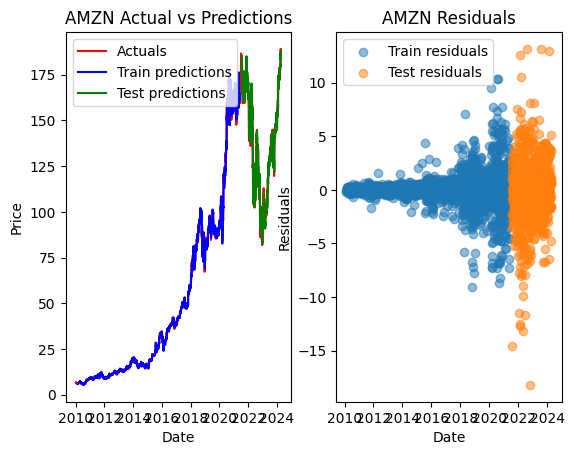

AMZN Train MSE: 1.8058194607806008, Test MSE: 10.800345846277809
AMZN Train MAE: 0.6823354684763749, Test MAE: 2.360339304746218
AMZN Train RMSE: 1.3438078213720148, Test RMSE: 3.2863879634452484
AMZN Train R^2: 0.9991431526306964, Test R^2 : 0.9863095054690624


[*********************100%%**********************]  1 of 1 completed


2875
719
Summary for MSFT: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.387e+05
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:38:30   Log-Likelihood:                         -5380.2
No. Observations:                2844   AIC:                                  1.082e+04
Df Residuals:                    2814   BIC:                                  1.100e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0237      0.019      1.228      0.220      -0.014       0.062
x2            -0.0233      0.026     -0.890      0.373      -0.075       0.028
x3             0.0413      0.026      1.581      0.114      -0.010       0.093
x4             0.0417      0.026      1.594      0.111      -0.010       0.093
x5             0.0200      0.026      0.763      0.445      -0.031       0.071
x6            -0.0605      0.026     -2.318      0.021      -0.112      -0.009
x7            -0.0143      0.026     -0.549      0.583      -0.065       0.037
x8             0.0212      0.026      0.813      0.416      -0.030       0.072
x9            -0.0063      0.026     -0.241      0.810      -0.057       0.045
x10           -0.0120      0.026     -0.462      0.644      -0.063       0.039
x11           -0.0511      0.026     -1.967      0.049      -0.102      -0.000
x12            0.0398      0.026      1.534      0.125      -0.011       0.091
x13           -0.0237      0.026     -0.912      0.362      -0.075       0.027
x14            0.0306      0.026      1.181      0.238      -0.020       0.081
x15           -0.0105      0.026     -0.407      0.684      -0.061       0.040
x16            0.0578      0.026      2.227      0.026       0.007       0.109
x17           -0.0676      0.026     -2.611      0.009      -0.118      -0.017
x18            0.0310      0.026      1.199      0.231      -0.020       0.082
x19            0.0477      0.026      1.844      0.065      -0.003       0.098
x20           -0.0756      0.026     -2.929      0.003      -0.126      -0.025
x21           -0.0370      0.026     -1.437      0.151      -0.087       0.013
x22            0.0101      0.026      0.394      0.694      -0.040       0.061
x23            0.0528      0.026      2.056      0.040       0.002       0.103
x24            0.0020      0.026      0.077      0.939      -0.048       0.052
x25           -0.0128      0.026     -0.500      0.617      -0.063       0.037
x26           -0.0306      0.026     -1.192      0.233      -0.081       0.020
x27            0.0243      0.026      0.949      0.343      -0.026       0.075
x28            0.0949      0.026      3.707      0.000       0.045       0.145
x29           -0.0294      0.026     -1.148      0.251      -0.080       0.021
x30            0.9179      0.019     48.637      0.000       0.881       0.955
==============================================================================
Omnibus:                      951.162   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29960.148
Skew:                          -0.948   Prob(JB):                         0.00
Kurtosis:                      18.787   Cond. No.            

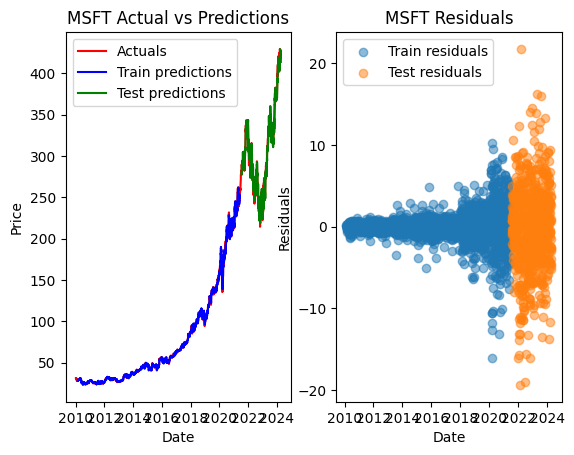

MSFT Train MSE: 2.5744498656345005, Test MSE: 26.600839629685883
MSFT Train MAE: 0.8642313789691703, Test MAE: 3.898496668380781
MSFT Train RMSE: 1.6045092289028757, Test RMSE: 5.157600181255415
MSFT Train R^2: 0.9992840484954597, Test R^2 : 0.9894830656546602


[*********************100%%**********************]  1 of 1 completed


2875
719
Summary for AAPL: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.118e+05
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:38:32   Log-Likelihood:                         -4067.7
No. Observations:                2844   AIC:                                      8195.
Df Residuals:                    2814   BIC:                                      8374.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0091      0.019      0.474      0.635      -0.029       0.047
x2            -0.0413      0.026     -1.562      0.118      -0.093       0.011
x3             0.0187      0.026      0.706      0.480      -0.033       0.070
x4             0.0727      0.026      2.751      0.006       0.021       0.124
x5            -0.0350      0.026     -1.324      0.185      -0.087       0.017
x6             0.0233      0.026      0.882      0.378      -0.028       0.075
x7            -0.0302      0.026     -1.148      0.251      -0.082       0.021
x8             0.0375      0.026      1.428      0.153      -0.014       0.089
x9            -0.0150      0.026     -0.572      0.567      -0.067       0.036
x10           -0.0455      0.026     -1.732      0.083      -0.097       0.006
x11            0.0031      0.026      0.116      0.908      -0.048       0.055
x12           -0.1099      0.026     -4.199      0.000      -0.161      -0.059
x13            0.0843      0.026      3.229      0.001       0.033       0.135
x14            0.0634      0.026      2.435      0.015       0.012       0.114
x15           -0.0588      0.026     -2.264      0.024      -0.110      -0.008
x16            0.0430      0.026      1.658      0.097      -0.008       0.094
x17           -0.0253      0.026     -0.973      0.331      -0.076       0.026
x18            0.0222      0.026      0.854      0.393      -0.029       0.073
x19           -0.0103      0.026     -0.394      0.693      -0.061       0.041
x20            0.0111      0.026      0.425      0.671      -0.040       0.062
x21           -0.0585      0.026     -2.247      0.025      -0.110      -0.007
x22            0.0458      0.026      1.759      0.079      -0.005       0.097
x23           -0.0131      0.026     -0.504      0.614      -0.064       0.038
x24           -0.0438      0.026     -1.686      0.092      -0.095       0.007
x25            0.0655      0.026      2.526      0.012       0.015       0.116
x26           -0.0376      0.026     -1.450      0.147      -0.088       0.013
x27            0.0422      0.026      1.627      0.104      -0.009       0.093
x28            0.0783      0.026      3.021      0.003       0.027       0.129
x29           -0.0379      0.026     -1.465      0.143      -0.089       0.013
x30            0.9433      0.019     50.040      0.000       0.906       0.980
==============================================================================
Omnibus:                      694.887   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43119.329
Skew:                          -0.036   Prob(JB):                         0.00
Kurtosis:                      22.075   Cond. No.            

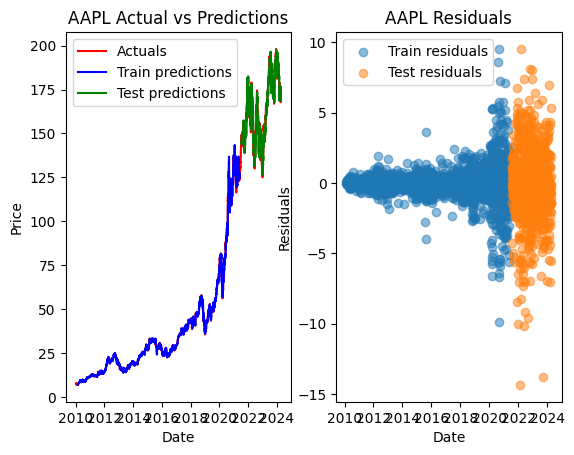

AAPL Train MSE: 1.022947914218808, Test MSE: 8.181606468838583
AAPL Train MAE: 0.5241054124880259, Test MAE: 2.126116219646101
AAPL Train RMSE: 1.0114088758849251, Test RMSE: 2.8603507597563245
AAPL Train R^2: 0.9988635787673921, Test R^2 : 0.9728553918342517


In [20]:
for val in stock_symbols:
    train_mse, test_mse, train_mae, test_mae, train_r2, test_r2 = model_func(val)
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    print(f"{val} Train MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"{val} Train MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"{val} Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"{val} Train R^2: {train_r2}, Test R^2 : {test_r2}")